<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-01-06 01:36:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  1.62MB/s    in 21s     

2024-01-06 01:36:58 (1.68 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


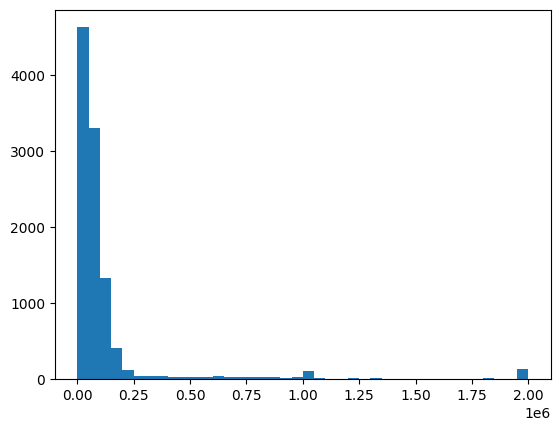

In [14]:
# your code goes here
QUERY = """ SELECT * FROM master"""
df1 = pd.read_sql_query(QUERY,conn)
ax = plt.hist(df1['ConvertedComp'], bins = 40)

### Box Plots


Plot a box plot of `Age.`


<Axes: >

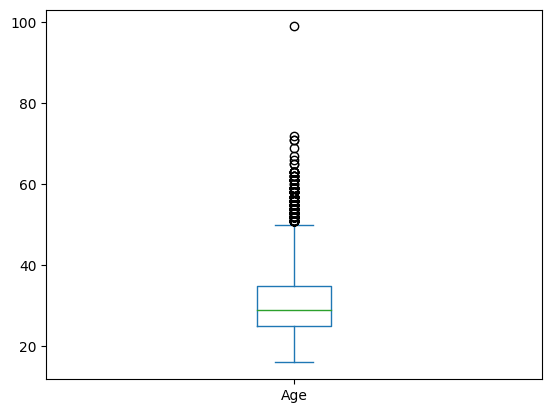

In [17]:
# your code goes here
df1['Age'].plot(kind='box')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


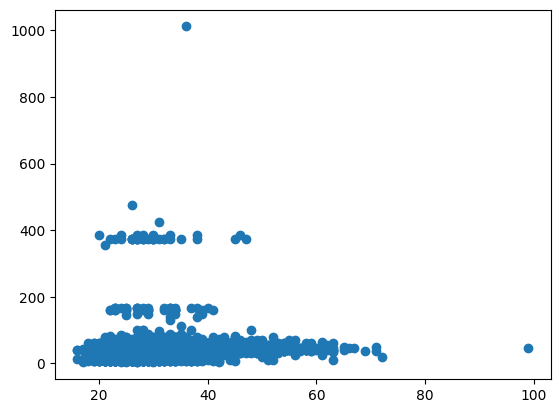

In [18]:
# your code goes here
plt.scatter(x=df1['Age'], y=df1['WorkWeekHrs'])

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


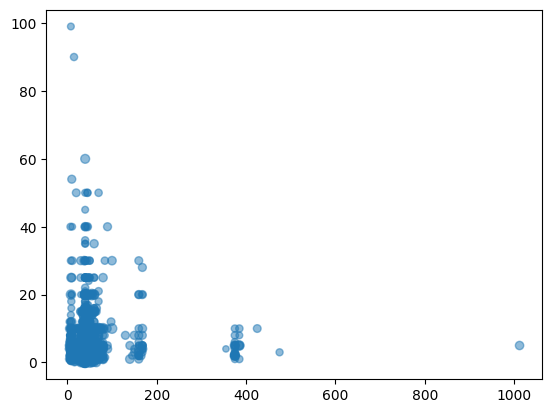

In [30]:
# your code goes here
plt.scatter(data = df1,x='WorkWeekHrs', y='CodeRevHrs', s='Age', alpha = 0.5)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x7f12fc58f9a0>,
 [Text(0.7726198006779451, 0.78298061508595, 'JavaScript'),
  Text(-0.6655599729548589, 0.8758024448471969, 'HTML/CSS'),
  Text(-1.0365032704151453, -0.3683218299513461, 'Python'),
  Text(-0.005190751137038743, -1.0999877527057442, 'SQL'),
  Text(0.9714054536730958, -0.516111852774345, 'TypeScript')],
 [Text(0.42142898218797004, 0.4270803355014272, '25.21%'),
  Text(-0.36303271252083213, 0.4777104244621074, '20.26%'),
  Text(-0.5653654202264428, -0.20090281633709786, '19.92%'),
  Text(-0.0028313188020211324, -0.5999933196576785, '19.06%'),
  Text(0.529857520185325, -0.28151555605873363, '15.55%')])

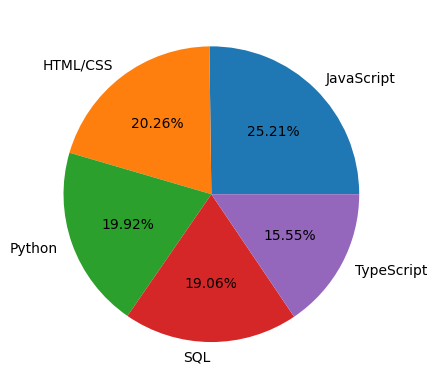

In [55]:
# your code goes here
QUERY = """ SELECT LanguageDesireNextYear, count(*) as count FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count
desc limit 5"""
df2 = pd.read_sql_query(QUERY, conn)
plt.pie(df2['count'], labels=df2['LanguageDesireNextYear'], autopct = '%1.2f%%')

In [57]:
QUERY = """ SELECT LanguageWorkedWith, count(*) as count FROM LanguageWorkedWith
group by LanguageWorkedWith
order by count
desc"""
df4 = pd.read_sql_query(QUERY, conn)
df4

,LanguageWorkedWith,count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [58]:
QUERY = """ SELECT respondent,DatabaseWorkedWith FROM DatabaseWorkedWith 
WHERE respondent in (SELECT respondent from (SELECT respondent,count(respondent) as LangCount
FROM DatabaseWorkedWith
GROUP BY Respondent) where LangCount=1)
AND DatabaseWorkedWith='MySQL'
"""
df5 = pd.read_sql_query(QUERY, conn)
len(df5)

474

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<BarContainer object of 6 artists>

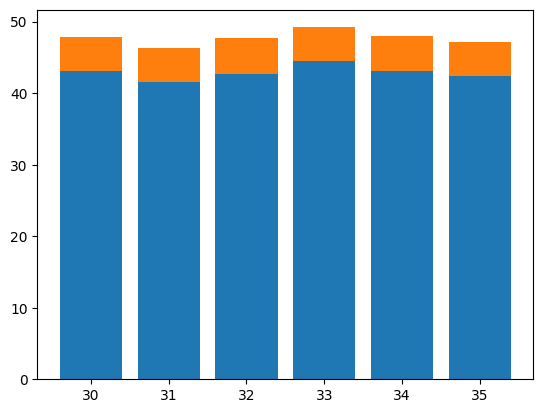

In [49]:
# your code goes here
QUERY = """
SELECT Avg(WorkWeekHrs) as WorkWeekHrs, Avg(CodeRevHrs) as CodeRevHrs, Age 
FROM master 
where Age between 30 and 35
group by Age
"""
df3 = pd.read_sql_query(QUERY, conn)
plt.bar(df3['Age'], df3['WorkWeekHrs'])
plt.bar(df3['Age'], df3['CodeRevHrs'], bottom = df3['WorkWeekHrs'])

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Axes: xlabel='Age'>

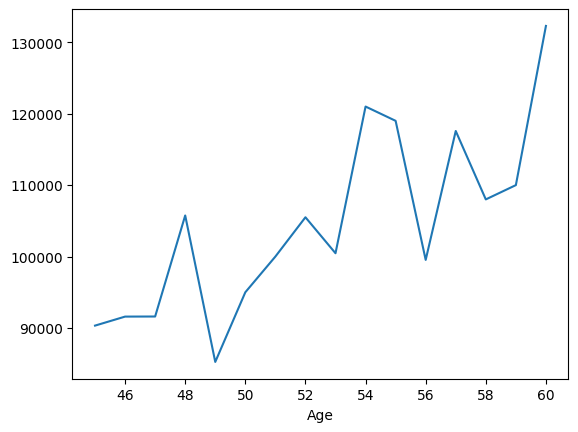

In [63]:
# your code goes here
QUERY = """ SELECT Age, ConvertedComp from master where Age between 45 and 60 """
df6 = pd.read_sql_query(QUERY, conn)
df6 = df6.groupby('Age')['ConvertedComp'].median()
df6.plot()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: ylabel='MainBranch'>

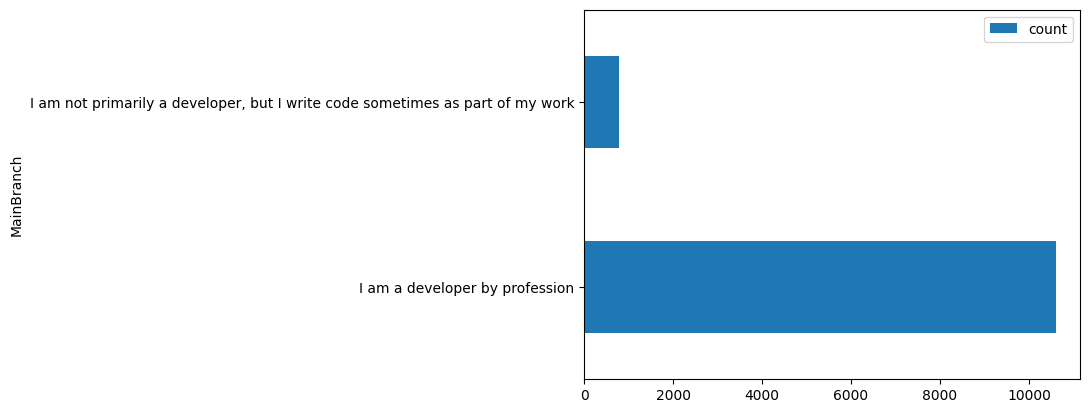

In [68]:
# your code goes here
QUERY = """ select MainBranch, count(*) as count from master
group by MainBranch"""
df7 = pd.read_sql_query(QUERY, conn)
df7.plot(kind='barh', x = 'MainBranch')

In [85]:
QUERY = """ SELECT DevType, count(*) as count FROM DevType
group by DevType
order by count
desc"""
df9 = pd.read_sql_query(QUERY,conn)
df9

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


<Axes: xlabel='Age'>

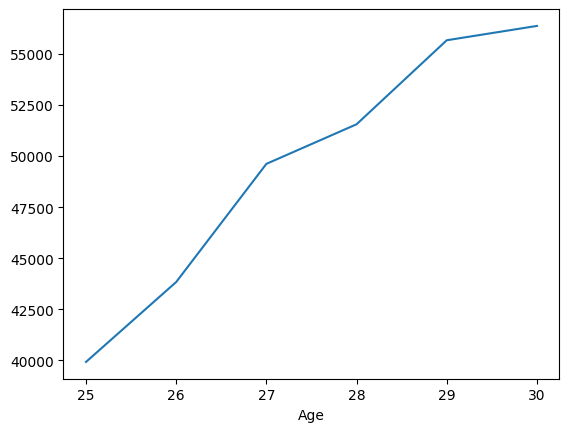

In [69]:
QUERY = """ SELECT Age, ConvertedComp from master where Age between 25 and 30"""
df8 = pd.read_sql_query(QUERY, conn)
df8 = df8.groupby('Age')['ConvertedComp'].median()
df8.plot()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
